In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
from multiprocessing import Pool

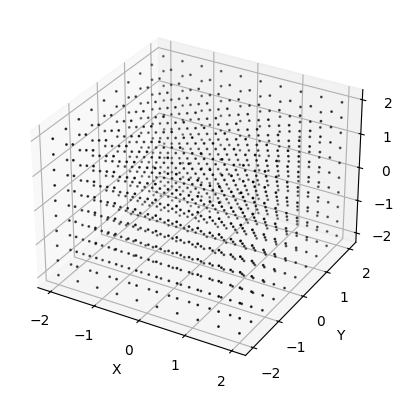

In [2]:
N_realisation =0
np.random.seed(N_realisation)
N0_particle = 10 ** 3

# XP0 = np.random.uniform(-2, 2, N0_particle) 
# YP0 = np.random.uniform(-2, 2, N0_particle)
# ZP0 = np.random.uniform(-2, 2, N0_particle)

xp0 = np.linspace(-2, 2, 10)
yp0 = np.linspace(-2, 2, 10)
zp0 = np.linspace(-2, 2, 10)

XP0, YP0, ZP0 = np.meshgrid(xp0, yp0, zp0, indexing='ij')

St0 = 1
R0 = 1
a = R0
# a, alpha, R, Fr, gravity = 1, 1, 2/3, 5, False

xl, xr = -2, 2
yl, yr = -3, 3
zd, zu = -4, 4

dx_col, dy_col, dz_col = 1, 1, 1
Nx_col, Ny_col, Nz_col = 4, 4, 4
gridA_xc, gridA_yc, gridA_zc = np.meshgrid(np.linspace(xl+dx_col/2, xr-dx_col/2, Nx_col), 
                                           np.linspace(yl+dy_col/2, yr-dy_col, Ny_col), 
                                           np.linspace(zd+dz_col/2, zu-dz_col/2, Nz_col), indexing='ij')
gridB_xc, gridB_yc, gridB_zc = np.meshgrid(np.linspace(xl, xr, Nx_col+1), np.linspace(yl, yr, Ny_col+1), np.linspace(zd, zu, Nz_col+1), indexing='ij')

# Plot grid lines
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# # Plot lines along x-axis
# for i in range(Ny_col):
#     for j in range(Nz_col):
#         ax.plot(gridA_xc[:, i, j], gridA_yc[:, i, j], gridA_zc[:, i, j], color='r',linestyle='--')

# # Plot lines along y-axis
# for i in range(Nx_col):
#     for j in range(Nz_col):
#         ax.plot(gridA_xc[i, :, j], gridA_yc[i, :, j], gridA_zc[i, :, j], color='g',linestyle='--')


# # Plot lines along z-axis
# for i in range(Nx_col):
#     for j in range(Ny_col):
#         ax.plot(gridA_xc[i, j, :], gridA_yc[i, j, :], gridA_zc[i, j, :], color='b',linestyle='--')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(XP0, YP0, ZP0,s=1, c='k', marker='o')


plt.show()

In [3]:
X, Y, Z = np.meshgrid(np.linspace(-2, 2, 101), np.linspace(-2, 2, 100), np.linspace(-2, 2, 101), indexing='ij')
if Y.any() == 0:
    raise ValueError('Y cannot be zero')
PHI = np.arctan(Z/Y)
dist = np.sqrt(X**2 + Y**2 + Z**2)
r_planar = np.sqrt(Z**2 + Y**2)

mask = dist > R0

Ux = -(2 * (r_planar)**2 + X**2 -1) / 5
Ux[mask] = (-(a**5)/15) * (2/(a**3) + (r_planar[mask]**2 - 2*(X[mask]**2))/(dist[mask]**5))

Ur = X * r_planar / 5
Ur[mask] = (a**5) * X[mask] * r_planar[mask] / (5 * dist[mask]**5)

Uy = Ur * Y / r_planar
Uz = Ur * Z / r_planar

# a simple test to verify result
# test = Uy[:, :, 50]
# plt.contourf(X[:, :, 50], Y[:, :, 50], test, 50)
# plt.colorbar()

# # Plot velocity field
# ax = plt.figure().add_subplot(projection='3d')
# ax.quiver(X, Y, Z, Ux, Uy, Uz, length=0.2, normalize=True)


# plt.show()

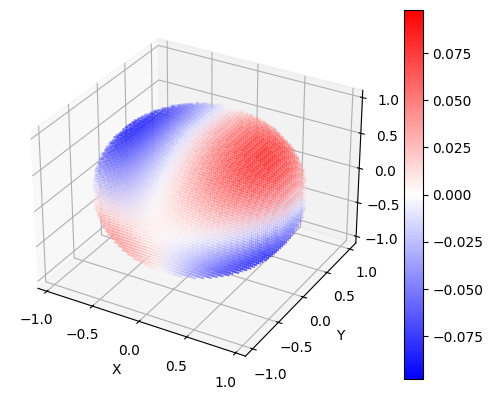

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X[dist<=R0], Y[dist<=R0], Z[dist<=R0], c=Uz[dist<=R0], s=0.1,  cmap='bwr')
fig.colorbar(img)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
# def solve_ivp_active_3d(args):


#         q0, t_span = args

#         # gravity = True
#         positive_time = True

#         def active_tracer_traj(t, Z) :
#                 # state-space vector 
#                 # Z[0] : xp, Z[1] : yp, Z[2] : zp
#                 # Z[3] : vx, Z[4] : vy, Z[5] : vz
#                 # compute flow field at particle position (xp, yp, zp)

#                 # for dimensional reason, the following propertes must be 1
#                 a, alpha = 1, 1

#                 xp = Z[0]
#                 yp = Z[1]
#                 zp = Z[2]
#                 dist = np.sqrt(xp**2 + yp**2+ zp**2)
#                 r_planar = np.sqrt(yp**2 + zp**2)

#                 if dist <= a:
#                         Ux = alpha * (a**2 - dist**2 - r_planar**2) / 5
#                         Uy = alpha * xp * yp / 5
#                         Uz = xp * zp / 5

#                         dUxdt = 0
#                         dUydt = 0
#                         dUzdt = 0
                                                   
#                         dUxdx = -2 * alpha * xp / 5
#                         dUxdy = -4 * alpha * yp / 5
#                         dUxdz = -4 * alpha * zp / 5

#                         dUydx = alpha * yp / 5
#                         dUydy = alpha * xp / 5
#                         dUydz = 0

#                         dUzdx = zp / 5
#                         dUzdy = 0
#                         dUzdz = xp / 5


#                 else :
#                         Ux = (-alpha*(a**5)/15) * (2/(a**3) + (r_planar**2 - 2*(xp**2))/(dist**5))
#                         Uy = alpha* a**5 * yp * xp/ ( 5*(dist ** 5))
#                         Uz = alpha* a**5 * zp * xp/ ( 5*(dist ** 5))

#                         dUxdt = 0
#                         dUydt = 0
#                         dUzdt = 0

#                         dUxdx = (-alpha*(a**5)/15) * (6 * (xp ** 3) - 9 * (xp * (r_planar ** 2)))/(dist**7)
#                         dUxdy = (-alpha*(a**5)/15) * yp * (-3 * (r_planar ** 2) + 12 * (xp ** 2))/(dist**7)
#                         dUxdz = (-alpha*(a**5)/15) * zp * (-3 * (r_planar ** 2) + 12 * (xp ** 2))/(dist**7)

#                         dUydx = (alpha * (a**5)/5) * yp * ((r_planar ** 2) - 4 * ( xp ** 2)) / (dist**7)
#                         dUydy = (alpha * (a**5)/5) * ((xp ** 3) - 4 * (xp * (yp ** 2)) + xp * (zp**2)) / (dist**7)
#                         dUydz = - ( xp * yp * zp) / (dist**7)

#                         dUzdx = (alpha * (a**5)/5) * zp * ((r_planar ** 2) - 4 * ( xp ** 2)) / (dist**7)
#                         dUzdy = - ( xp * yp * zp) / (dist**7)
#                         dUzdz = (alpha * (a**5)/5) * ((xp ** 3) - 4 * (xp * (zp ** 2)) + xp * (yp**2)) / (dist**7)



#                 # define derivatives
#                 dxpdt = Z[3]  # vx
#                 dypdt = Z[4]  # vy
#                 dzpdt = Z[5]  # vz
#                 ddxpdtt = R*(Ux - dxpdt)/St + (3*R/2) * (dUxdt + Ux*dUxdx + Uy*dUxdy + Uz*dUxdz)
#                 ddypdtt = R*(Uy - dypdt)/St + (3*R/2) * (dUydt + Ux*dUydx + Uy*dUydy + Uz*dUydz) 
#                 ddzpdtt = R*(Uz - dzpdt)/St + (3*R/2) * (dUzdt + Ux*dUzdx + Uy*dUzdy + Uz*dUzdz) - gravity * (1-3*R/2) / (Fr**2)
                 

#                 if positive_time:
#                         return [dxpdt, dypdt, dzpdt, ddxpdtt, ddypdtt, ddzpdtt]
#                 else:
#                         return [-dxpdt, -dypdt, -dzpdt, -ddxpdtt, -ddypdtt, -ddzpdtt]


#         x0, y0, z0, vx0, vy0, vz0, St = q0
#         sol = sp.integrate.solve_ivp(active_tracer_traj, [t_span[0], t_span[-1]], [x0, y0, z0, vx0, vy0, vz0], t_eval=t_span, vectorized=True)
#         xpt, ypt, zpt, vxt, vyt, vzt = sol.y[0][-1], sol.y[1][-1], sol.y[2][-1], sol.y[3][-1], sol.y[4][-1], sol.y[5][-1]
#         #   t_eval = sol.t

#         # return xpt, ypt, zpt, vxt, vyt, vzt
#         return sol.y[0], sol.y[1], sol.y[2], sol.y[3], sol.y[4], sol.y[5]


In [6]:
# # release stationary particles
# initial_states = np.hstack((XP0[:, np.newaxis], YP0[:, np.newaxis], ZP0[:, np.newaxis], np.zeros((N0_particle, 3)), St0 * np.ones((N0_particle, 1))))
# t_span = np.linspace(0, 1, 1000)

# n_proc = 12

# with Pool(n_proc) as pool:
#         args = list(zip(initial_states, [t_span]*len(initial_states)))
#         res = pool.map( solve_ivp_active_3d, args )


# res_array = np.stack(res, axis=0)  # shape (n_bubbles, 4, len(t_span))


In [7]:
    # # plt.sca(ax=this_ax)
    # plt.scatter(res_array[:, 0, :].T, res_array[:, 1, :].T, res_array[:, :, 0].T, s=0.01, c=color, linewidths=0)
    # plt.axis('equal')
    # plt.xlim(-2, 2)
    # plt.ylim(-2, 2)

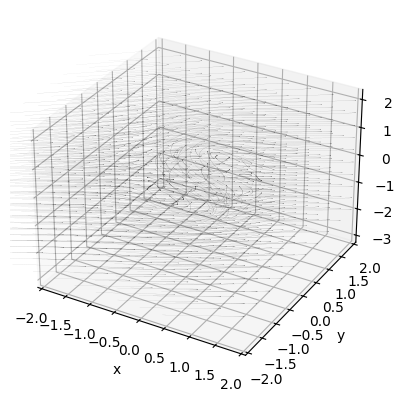

In [8]:
import advect_bubbles_3d as adv3D

Bubbles_to_adv = np.hstack((np.arange(N0_particle)[:, np.newaxis], 
                            XP0.flatten()[:, np.newaxis], YP0.flatten()[:, np.newaxis], ZP0.flatten()[:, np.newaxis], 
                            np.zeros((N0_particle, 3)), St0 * np.ones((N0_particle, 1))))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

out = adv3D.advect_bubbles(Bubbles_to_adv, 0, 15, plot_path=True, this_ax=ax, color='k')

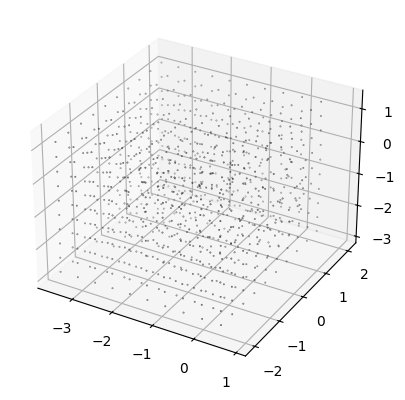

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(out[:, 0], out[:, 1], out[:, 2], s=0.1, c='k', marker='o')


